# Lec Linear Regression_Fama-French Five-Factor Model



# Asset Pricing Models

We briefly explore important asset pricing models on stock prcing: CAPM, Fama-French 3 Factor, Fama-French 5 factor 


## Capital Asset Pricing Model (CAPM)

The CAPM (Capital Asset Pricing Model) explains the relationship between systematic risk and the expected return for assets (e.g., stocks). The CAPM is used for pricing of risky assets, by generating the expected return of the asset given its riskiness, and calculating the cost of capital. Intuitively, the CAPM model tells us that the return of a risky asset is explained by the market factor (i.e., $r_m$)

\begin{eqnarray*}
\bar{r}_i = r_f + \beta_i (\bar{r}_m - r_f) 
\end{eqnarray*}	

$\bar{r}_i$: the expected return of the asset $i$. This is can be the return of the any stock (i.e., Apple, Google, Tesla) or investment portfolio (i.e., any mutual/hedge fund portfolio).

$r_f$: the return of the risk-free asset. The risk-free asset is usually given by the US 3-month Treasury bill. It is assumed that the US government will not default on a short-term government security, thus the US 3-month Treasury bill is widely assumed in finance to be risk-free. 

$\bar{r}_m$: the expected return of the market. This is usually given by the S\&P500 return as it is the largest market index in the world.

The CAPM can also be expressed mathematically in the following notation:

\begin{eqnarray*}
E(r_i) - r_f = \alpha_i + \beta_i (E(r_m) -r_f)  \\
r_i - r_f = \alpha_i + \beta_i (r_m -r_f) +\varepsilon_i
\end{eqnarray*}


## Fama-French 3-factor (FF3)

Another very popular asset pricing model in the empirical finance literature is the Fama-French 3-factor (FF3) that was published in 1993. Nobel Laureate Eugene Fama and researcher Kenneth French found that value stocks tend to outperform growth stocks (i.e., value), and that small-cap stocks outperform large-cap stocks (i.e., size). Thus, the FF3 mode adds in size and value as risk factors to the model as shown below

\begin{eqnarray*}
r_i - r_f = \alpha_i + \beta_i MKT + s_i SMB + h_i HML +\varepsilon_i
\end{eqnarray*} 

MKT ($r_m -r_f$) is the excess return of the market. It's the value-weighted return of all CRSP firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ minus the 1-month Treasury Bill rate.

SMB (Small Minus Big) measures the excess return of stocks with small market cap over those with larger market cap.

HML (High Minus Low) measures the excess return of value stocks over growth stocks. Value stocks have high book to price ratio (B/P) than growth stocks.


## Fama-French 5-factor (FF5)

In 2015, Fama-French added two more risk factors into their popular 3-factor asset pricing model to make a Fama-French 5-factor (FF5) model. This model added two 'quality' factors, namely profitability (stocks with a high operating profitability perform better) and investment (stocks of companies with high total asset growth have below average returns) factors.

\begin{eqnarray*}
r_i - r_f = \alpha_i + \beta_{mi} MKT + \beta_{si} SMB + \beta_{hi} HML + \beta_{ri} RMW + \beta_{ci} CMA+\varepsilon_i
\end{eqnarray*}


MKT $ = r_m -r_f$

SMB (Small - Big): MKT  =rm−rf 

SMB (Small - Big): The return spread of small minus large stocks (size).

HML (High - Low): The return of cheap minus expensive stocks (value).

RMW (Robust - Weak) measures the excess returns of firms with high operating profit margins over those with lower profits. (Novy-Marx, 2013)

CMA (Conservative - Aggressive) measures the excess returns of firms investing less over those investing more 

HML (High - Low): The return of cheap minus expensive stocks (value).

RMW (Robust - Weak) measures the excess returns of firms with high operating profit margins over those with lower profits. (Novy-Marx, 2013)

CMA (Conservative - Aggressive) measures the excess returns of firms investing less over those investing more (Fama and French, 2015) 




### References

Ken French’s Data Library : mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html 

Fama, E F; French, K R (1993). Common risk factors in the returns on stocks and bonds. Journal of Financial Economics. 33: 3-56.

Fama, E F; French, K R (2015). A Five-Factor Asset Pricing Model. Journal of Financial Economics, 116, 1–22.

Novy-Marx, R. (2013). The Other Side of Value: The Gross Profitability Premium. Journal of Financial Economics, 108, 1-28. 

### Fama-French Data (Ken French’s Data Library)

**class** pandas_datareader.famafrench.**FamaFrenchReader(symbols, start=None, end=None, retry_count=3, pause=0.1, timeout=30, session=None, freq=None)**

Get data for the given name from the Fama/French data library.

For annual and monthly data, index is a pandas.PeriodIndex, otherwise it’s a pandas.DatetimeIndex.

In [ ]:
# 필요한 라이브러리들을 불러보아요 

import pandas as pd
import numpy as np 
import datetime as dt
import pandas_datareader.data as pdr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 종속변수 데이터를 모아 보아요 

In [ ]:
# 표본시간을 정해보아요. 

end = dt.datetime.today()
start = dt.datetime(2000,1,1)

# 선택하고싶은 주식이나 펀드를 선택해보아요. 

snp = pdr.DataReader('^GSPC','yahoo',start,end) #S&P500
apl = pdr.DataReader('AAPL','yahoo',start,end) # Apple
ggl = pdr.DataReader('GOOG','yahoo',start,end) # Google 
tsl = pdr.DataReader('TSLA','yahoo',start,end) # Tesla
nfx = pdr.DataReader('NFLX','yahoo',start,end) # Netflix
fb = pdr.DataReader('FB','yahoo',start,end) # Facebook 

fid = pdr.DataReader('FDGRX', 'yahoo', start, end) # Fidelity funds 
apl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229
...,...,...,...,...,...,...
2021-04-29,137.070007,132.449997,136.470001,133.479996,151101000.0,133.479996
2021-04-30,133.559998,131.070007,131.779999,131.460007,109713200.0,131.460007
2021-05-03,134.070007,131.830002,132.039993,132.539993,75135100.0,132.539993


In [ ]:
# Adjusted Cloase Price만을 DataFrame에 따로 모아보아요. 
stk = pd.DataFrame({
    'snp':snp['Adj Close'],
    'apl':apl['Adj Close'],
    'ggl':ggl['Adj Close'],
    'tsl':tsl['Adj Close'],
    'nfx':nfx['Adj Close'],
    'fb':fb['Adj Close'],
    'fid':fid['Adj Close'],
}).dropna()
stk

,snp,apl,ggl,tsl,nfx,fb,fid
Date,,,,,,,
2012-05-18,1295.219971,16.316067,299.078979,5.512000,9.994286,38.230000,8.674459
2012-05-21,1315.989990,17.266645,305.908386,5.754000,10.248571,34.029999,8.912210
2012-05-22,1316.630005,17.134058,299.278229,6.160000,9.672857,31.000000,8.897287
2012-05-23,1318.859985,17.552126,303.592072,6.204000,10.272857,32.000000,8.954986
2012-05-24,1320.680054,17.390926,300.702881,6.056000,10.038571,33.029999,8.931110
...,...,...,...,...,...,...,...
2021-04-28,4183.180176,133.580002,2379.909912,694.400024,506.519989,307.100006,36.330002
2021-04-29,4211.470215,133.479996,2429.889893,677.000000,509.000000,329.510010,36.290001
2021-04-30,4181.169922,131.460007,2410.120117,709.440002,513.469971,325.079987,35.840000


In [ ]:
stk.columns

Index(['snp', 'apl', 'ggl', 'tsl', 'nfx', 'fb', 'fid'], dtype='object')

In [ ]:
s_ret= stk.pct_change()*100
s_ret.columns=['r_snp', 'r_apl', 'r_ggl', 'r_tsl', 'r_nfx', 'r_fb', 'r_fid'] 
s_ret


,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,1.603590,5.826028,2.283479,4.390423,2.544312,-10.986139,2.740817
2012-05-22,0.048634,-0.767882,-2.167367,7.055955,-5.617506,-8.903905,-0.167435
2012-05-23,0.169370,2.439982,1.441415,0.714288,6.202918,3.225806,0.648493
2012-05-24,0.138003,-0.918405,-0.951669,-2.385554,-2.280625,3.218746,-0.266614
...,...,...,...,...,...,...,...
2021-04-28,-0.084554,-0.602722,3.155007,-1.467203,0.191870,1.162829,0.303701
2021-04-29,0.676281,-0.074866,2.100079,-2.505764,0.489618,7.297298,-0.110104
2021-04-30,-0.719471,-1.513327,-0.813608,4.791729,0.878187,-1.344428,-1.240013


In [ ]:
stock = pd.merge(stk,s_ret, left_index=True, right_index=True, how='inner')
stock

,snp,apl,ggl,tsl,nfx,fb,fid,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,
2012-05-18,1295.219971,16.316067,299.078979,5.512000,9.994286,38.230000,8.674459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-05-21,1315.989990,17.266645,305.908386,5.754000,10.248571,34.029999,8.912210,1.603590,5.826028,2.283479,4.390423,2.544312,-10.986139,2.740817
2012-05-22,1316.630005,17.134058,299.278229,6.160000,9.672857,31.000000,8.897287,0.048634,-0.767882,-2.167367,7.055955,-5.617506,-8.903905,-0.167435
2012-05-23,1318.859985,17.552126,303.592072,6.204000,10.272857,32.000000,8.954986,0.169370,2.439982,1.441415,0.714288,6.202918,3.225806,0.648493
2012-05-24,1320.680054,17.390926,300.702881,6.056000,10.038571,33.029999,8.931110,0.138003,-0.918405,-0.951669,-2.385554,-2.280625,3.218746,-0.266614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28,4183.180176,133.580002,2379.909912,694.400024,506.519989,307.100006,36.330002,-0.084554,-0.602722,3.155007,-1.467203,0.191870,1.162829,0.303701
2021-04-29,4211.470215,133.479996,2429.889893,677.000000,509.000000,329.510010,36.290001,0.676281,-0.074866,2.100079,-2.505764,0.489618,7.297298,-0.110104
2021-04-30,4181.169922,131.460007,2410.120117,709.440002,513.469971,325.079987,35.840000,-0.719471,-1.513327,-0.813608,4.791729,0.878187,-1.344428,-1.240013


In [ ]:
s_ret.describe()

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,0.057476,0.107799,0.104518,0.275508,0.218022,0.121367,0.070089
std,1.057822,1.808048,1.611705,3.537133,3.002997,2.347604,1.296760
min,-11.984055,-12.864704,-11.100820,-21.062826,-25.015547,-18.960922,-12.486718
25%,-0.316282,-0.712111,-0.620309,-1.451860,-1.155965,-0.940830,-0.468680
50%,0.064779,0.089032,0.069122,0.134678,0.060002,0.105488,0.147523
75%,0.521936,1.027361,0.885358,1.902345,1.523242,1.232518,0.737782
max,9.382774,11.980826,16.052431,24.395054,42.223510,29.611469,8.760425


In [ ]:
# 기초통계표 
df=s_ret
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

             r_snp        r_apl  ...         r_fb        r_fid
count  2253.000000  2253.000000  ...  2253.000000  2253.000000
mean      0.057476     0.107799  ...     0.121367     0.070089
std       1.057822     1.808048  ...     2.347604     1.296760
min     -11.984055   -12.864704  ...   -18.960922   -12.486718
25%      -0.316282    -0.712111  ...    -0.940830    -0.468680
50%       0.064779     0.089032  ...     0.105488     0.147523
75%       0.521936     1.027361  ...     1.232518     0.737782
max       9.382774    11.980826  ...    29.611469     8.760425
var       1.118987     3.269036  ...     5.511243     1.681587
skew     -0.663009    -0.186199  ...     0.950497    -0.894070
kurt     20.323637     6.527888  ...    18.449474     9.704891

[11 rows x 7 columns]


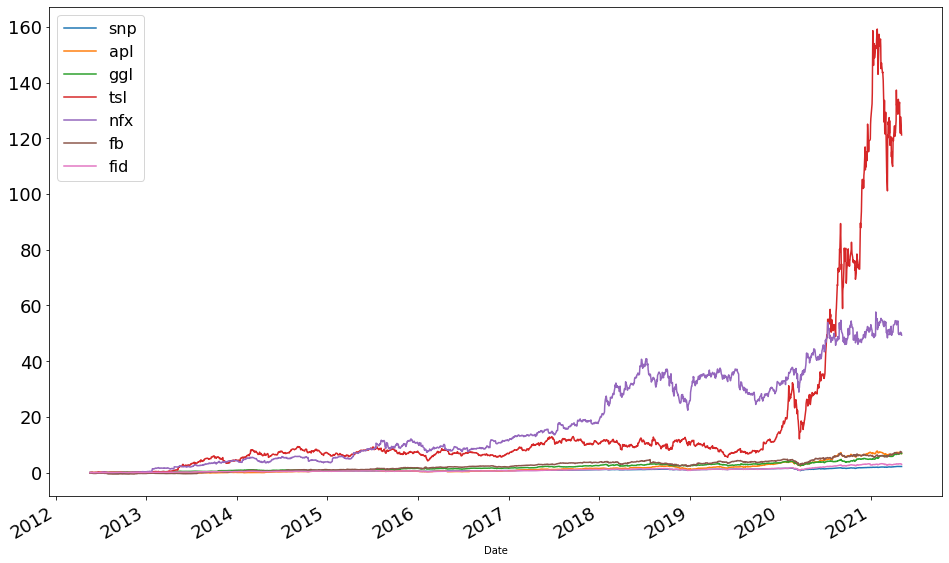

In [ ]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가 (relative stock price) 를 표현해보자 

s_pr = stk / stk.iloc[0] - 1.0 

# 상대가격을 그래프로 그려보아요. 
plt.rcParams['legend.fontsize'] = 16
s_pr.plot( figsize=(16,10), fontsize=18)

In [ ]:
# 요인모형의 데이터 주기가 월별이랍니다. 그래서 일별 주가수익률의 자료를 월별 주가수익률 자료로 환산시켜줍니다. 
# 월별 수익률로 환산해 줍니다. 

s_retm= s_ret.resample('M').sum()
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05-31,1.189776,8.775726,-3.209451,7.497973,-9.148553,-23.709192,2.281330
2012-06-30,4.051099,1.259443,0.066935,7.004497,8.242885,6.027202,2.935262
2012-07-31,1.329112,4.723483,8.929896,-11.879240,-13.330341,-34.053312,0.528839
2012-08-31,1.993268,9.116565,8.034159,5.096211,5.520919,-16.863668,4.581638
2012-09-30,2.446543,0.478032,9.772297,4.090225,-8.398846,19.850826,2.216408
...,...,...,...,...,...,...,...
2021-01-31,-1.015353,-0.024916,5.099530,13.207939,0.304494,-5.067160,1.574669
2021-02-28,2.650937,-8.110565,10.826105,-14.684883,1.377662,-0.069191,2.261609
2021-03-31,4.279248,1.321268,1.868101,2.359060,-2.603979,14.014044,-0.585097


In [ ]:
# date format: yyyy-mm-dd ==> yyyy-mm

s_retm = s_retm.to_period('M')
s_retm

,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,
2012-05,1.189776,8.775726,-3.209451,7.497973,-9.148553,-23.709192,2.281330
2012-06,4.051099,1.259443,0.066935,7.004497,8.242885,6.027202,2.935262
2012-07,1.329112,4.723483,8.929896,-11.879240,-13.330341,-34.053312,0.528839
2012-08,1.993268,9.116565,8.034159,5.096211,5.520919,-16.863668,4.581638
2012-09,2.446543,0.478032,9.772297,4.090225,-8.398846,19.850826,2.216408
...,...,...,...,...,...,...,...
2021-01,-1.015353,-0.024916,5.099530,13.207939,0.304494,-5.067160,1.574669
2021-02,2.650937,-8.110565,10.826105,-14.684883,1.377662,-0.069191,2.261609
2021-03,4.279248,1.321268,1.868101,2.359060,-2.603979,14.014044,-0.585097


In [ ]:
# 기초통계표 
df=s_retm
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

            r_snp       r_apl       r_ggl  ...       r_nfx        r_fb       r_fid
count  109.000000  109.000000  109.000000  ...  109.000000  109.000000  109.000000
mean     1.188014    2.228184    2.160351  ...    4.506447    2.508613    1.448716
std      3.632798    7.821696    6.040924  ...   12.836117   10.195232    5.032444
min     -9.659446  -19.107630  -11.113489  ...  -23.099162  -34.053312  -15.596085
25%     -0.283628   -2.297312   -1.716510  ...   -3.876969   -3.967075   -1.613275
50%      1.733697    2.424464    1.877510  ...    4.248199    1.790537    1.981852
75%      3.004962    7.665264    5.939074  ...    9.278488    8.213815    4.018105
max     12.646589   20.088176   19.842690  ...   66.794365   43.253268   17.700327
var     13.197220   61.178928   36.492765  ...  164.765890  103.942764   25.325497
skew    -0.360277   -0.335346    0.332103  ...    1.287107    0.307169   -0.166603
kurt     1.673807   -0.199387    0.376126  ...    4.815033    3.164342    1.632117

[11

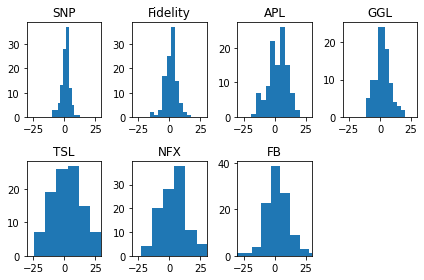

In [ ]:
# histogram

plt.subplot(241)
plt.hist(s_retm['r_snp'])
plt.title('SNP') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(242)
plt.hist(s_retm['r_fid'])
plt.title('Fidelity') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(243)
plt.hist(s_retm['r_apl'])
plt.title('APL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(244)
plt.hist(s_retm['r_ggl'])
plt.title('GGL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(245)
plt.hist(s_retm['r_tsl'])
plt.title('TSL') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(246)
plt.hist(s_retm['r_nfx'])
plt.title('NFX') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.subplot(247)
plt.hist(s_retm['r_fb'])
plt.title('FB') 
plt.xlim(-30, 30) # set fixed y axis scale

plt.tight_layout() # 그래프 겹치지 않게 
plt.show() 

In [ ]:
# Fama-French Factor Model의 데이터는 Ken French의 라이브러리에서 가져올 수 있답니다. (SCV 파일 이름을 파악할 것)
# 첫번째 데이터 묶음이 데이터입니다. 

# 5요인을 다운받도록 해요. (2000년 이후 있음)
ff5 = pdr.DataReader('F-F_Research_Data_5_Factors_2X3', 'famafrench', start, end)[0]
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2000-01,-4.74,4.38,-1.75,-6.07,4.73,0.41
2000-02,2.45,18.08,-8.94,-18.48,-0.51,0.43
2000-03,5.20,-14.89,7.66,11.53,-1.05,0.47
2000-04,-6.40,-5.25,7.41,7.66,5.27,0.46
2000-05,-4.42,-4.11,5.01,4.36,0.74,0.50
...,...,...,...,...,...,...
2020-11,12.47,6.75,2.11,-2.78,1.05,0.01
2020-12,4.63,4.67,-1.36,-2.15,0.00,0.01
2021-01,-0.03,6.88,2.85,-3.33,4.68,0.00


In [ ]:
# 포트폴리오도 다운 받도록 해요 : 25 Portfolios Formed on Size and Book-to-Market (5 x 5)
ffp = pdr.DataReader('25_Portfolios_5x5', 'famafrench', start, end)[0]
ffp

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01,9.5143,6.2750,5.2943,3.5304,4.9534,0.4170,-1.9296,-2.8937,0.9005,-2.9451,-3.4204,-5.0869,-1.3270,-4.7278,-5.5081,-4.0326,-3.1696,-3.8733,-4.0499,-9.2751,-4.9635,-3.8543,-4.9350,-6.7826,-9.5198
2000-02,37.2396,43.8675,21.8766,26.0701,14.6389,28.3682,18.7483,4.1582,9.4203,14.3460,23.1195,13.9458,1.5523,0.5378,-0.8765,26.1488,0.3075,-2.1789,2.5132,-3.7066,0.3492,-5.5935,-7.7148,-10.0217,-11.3287
2000-03,-13.6761,-19.4504,-8.6086,-7.4407,-2.4252,-13.0055,-6.5070,0.6268,-0.6259,-2.6250,-13.2781,-2.0772,11.0513,6.0125,12.9881,-3.1054,12.6995,14.3816,10.3099,12.8903,9.2365,11.2503,9.9605,16.1558,21.9868
2000-04,-23.1953,-18.5575,-10.4026,-11.3872,-10.0158,-11.9847,-8.9548,-6.1382,-1.8195,-2.8965,-10.0502,-0.5721,-1.7911,3.4308,0.3786,-7.1454,-2.9118,2.8567,0.9408,1.5979,-4.2882,-2.6457,0.5534,2.4320,-0.2160
2000-05,-14.3479,-9.4331,-5.6967,-7.4559,-6.9270,-10.1385,-5.5655,-5.5710,-6.8956,-1.2816,-5.5242,-2.7357,-1.6625,-0.5483,3.0112,-7.5522,0.7674,-0.3671,-1.9130,0.9875,-3.4711,-1.5894,4.9353,1.3729,7.6914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,25.4603,21.6852,19.8299,20.5356,23.9605,21.3881,19.0704,17.9596,19.0574,19.3157,19.8737,16.9854,15.3246,16.6395,21.5046,13.8204,12.8281,15.9609,15.7106,20.4074,10.7257,9.8547,14.4605,16.1654,21.9780
2020-12,13.1824,7.8131,9.2485,8.4380,7.1857,11.2639,10.0651,8.8478,8.5000,6.9177,12.2766,8.6516,6.9268,9.5035,7.9595,6.8499,5.9012,4.7273,7.8074,5.4380,5.3004,1.8685,3.4180,3.2349,8.0465
2021-01,16.6884,14.9932,8.1742,7.4137,39.7561,12.1049,5.8029,7.6529,3.7230,8.9171,2.5181,0.9032,2.4192,1.8087,4.3874,-0.2722,0.6493,-0.2155,2.3786,1.6662,-0.9357,-0.5954,-2.0951,0.8452,1.0989


In [ ]:
ff = pd.merge(ff5, ffp,left_index=True, right_index=True, how='inner')
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01,-4.74,4.38,-1.75,-6.07,4.73,0.41,9.5143,6.2750,5.2943,3.5304,4.9534,0.4170,-1.9296,-2.8937,0.9005,-2.9451,-3.4204,-5.0869,-1.3270,-4.7278,-5.5081,-4.0326,-3.1696,-3.8733,-4.0499,-9.2751,-4.9635,-3.8543,-4.9350,-6.7826,-9.5198
2000-02,2.45,18.08,-8.94,-18.48,-0.51,0.43,37.2396,43.8675,21.8766,26.0701,14.6389,28.3682,18.7483,4.1582,9.4203,14.3460,23.1195,13.9458,1.5523,0.5378,-0.8765,26.1488,0.3075,-2.1789,2.5132,-3.7066,0.3492,-5.5935,-7.7148,-10.0217,-11.3287
2000-03,5.20,-14.89,7.66,11.53,-1.05,0.47,-13.6761,-19.4504,-8.6086,-7.4407,-2.4252,-13.0055,-6.5070,0.6268,-0.6259,-2.6250,-13.2781,-2.0772,11.0513,6.0125,12.9881,-3.1054,12.6995,14.3816,10.3099,12.8903,9.2365,11.2503,9.9605,16.1558,21.9868
2000-04,-6.40,-5.25,7.41,7.66,5.27,0.46,-23.1953,-18.5575,-10.4026,-11.3872,-10.0158,-11.9847,-8.9548,-6.1382,-1.8195,-2.8965,-10.0502,-0.5721,-1.7911,3.4308,0.3786,-7.1454,-2.9118,2.8567,0.9408,1.5979,-4.2882,-2.6457,0.5534,2.4320,-0.2160
2000-05,-4.42,-4.11,5.01,4.36,0.74,0.50,-14.3479,-9.4331,-5.6967,-7.4559,-6.9270,-10.1385,-5.5655,-5.5710,-6.8956,-1.2816,-5.5242,-2.7357,-1.6625,-0.5483,3.0112,-7.5522,0.7674,-0.3671,-1.9130,0.9875,-3.4711,-1.5894,4.9353,1.3729,7.6914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,12.47,6.75,2.11,-2.78,1.05,0.01,25.4603,21.6852,19.8299,20.5356,23.9605,21.3881,19.0704,17.9596,19.0574,19.3157,19.8737,16.9854,15.3246,16.6395,21.5046,13.8204,12.8281,15.9609,15.7106,20.4074,10.7257,9.8547,14.4605,16.1654,21.9780
2020-12,4.63,4.67,-1.36,-2.15,0.00,0.01,13.1824,7.8131,9.2485,8.4380,7.1857,11.2639,10.0651,8.8478,8.5000,6.9177,12.2766,8.6516,6.9268,9.5035,7.9595,6.8499,5.9012,4.7273,7.8074,5.4380,5.3004,1.8685,3.4180,3.2349,8.0465
2021-01,-0.03,6.88,2.85,-3.33,4.68,0.00,16.6884,14.9932,8.1742,7.4137,39.7561,12.1049,5.8029,7.6529,3.7230,8.9171,2.5181,0.9032,2.4192,1.8087,4.3874,-0.2722,0.6493,-0.2155,2.3786,1.6662,-0.9357,-0.5954,-2.0951,0.8452,1.0989


In [ ]:
# 기초통계표 
df=ff5
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

           Mkt-RF         SMB         HML         RMW         CMA          RF
count  255.000000  255.000000  255.000000  255.000000  255.000000  255.000000
mean     0.564667    0.327137    0.143373    0.386863    0.262588    0.128510
std      4.548648    3.134002    3.301102    2.930865    2.063497    0.149851
min    -17.230000  -14.890000  -13.960000  -18.480000   -6.550000    0.000000
25%     -1.965000   -1.415000   -1.615000   -1.120000   -1.050000    0.010000
50%      1.170000    0.200000   -0.090000    0.340000    0.000000    0.080000
75%      3.235000    2.245000    1.740000    1.480000    1.225000    0.185000
max     13.650000   18.080000   12.580000   13.380000    9.560000    0.560000
var     20.690194    9.821968   10.897277    8.589967    4.258020    0.022455
skew    -0.521055    0.415358    0.139947   -0.365546    0.966393    1.127288
kurt     1.049989    5.396691    2.865157    9.125111    2.749833    0.146230


In [ ]:
ff5.corr()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Mkt-RF,1.000000,0.293371,0.008052,-0.399535,-0.232892,-0.166938
SMB,0.293371,1.000000,0.037545,-0.487106,0.034617,-0.025664
HML,0.008052,0.037545,1.000000,0.399056,0.579526,0.155399
RMW,-0.399535,-0.487106,0.399056,1.000000,0.267459,0.124826
CMA,-0.232892,0.034617,0.579526,0.267459,1.000000,0.171412
RF,-0.166938,-0.025664,0.155399,0.124826,0.171412,1.000000


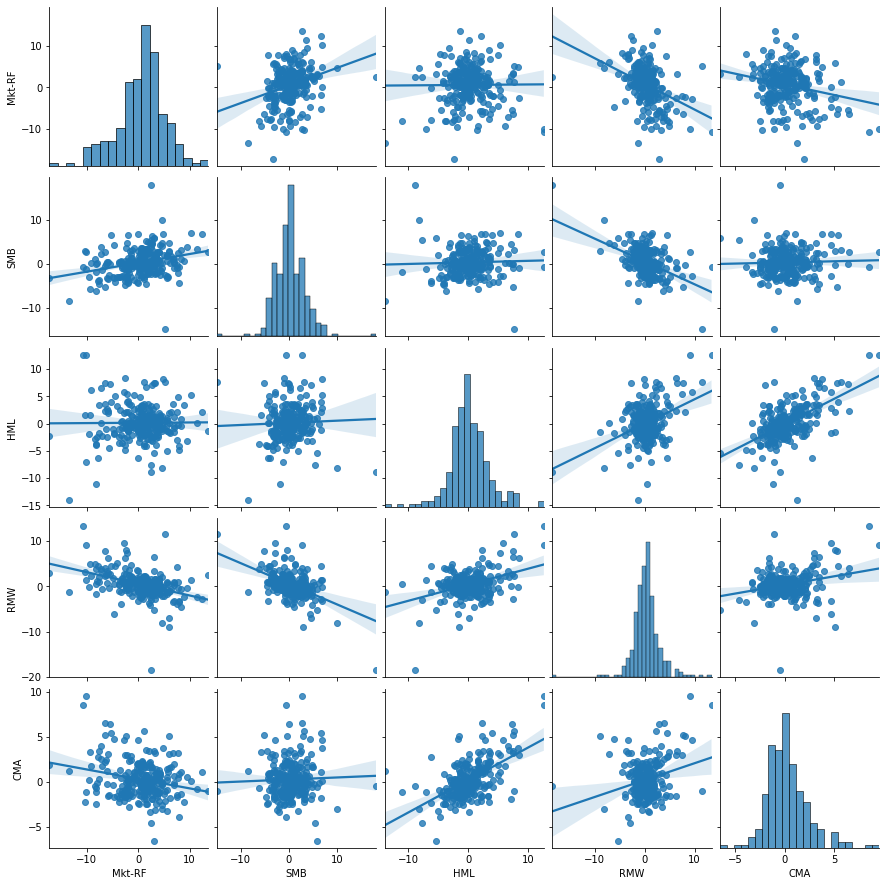

In [ ]:
# Pairplot: scatter matrices

sns.pairplot(data=ff, vars=['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'],
                 kind='reg')  

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_te

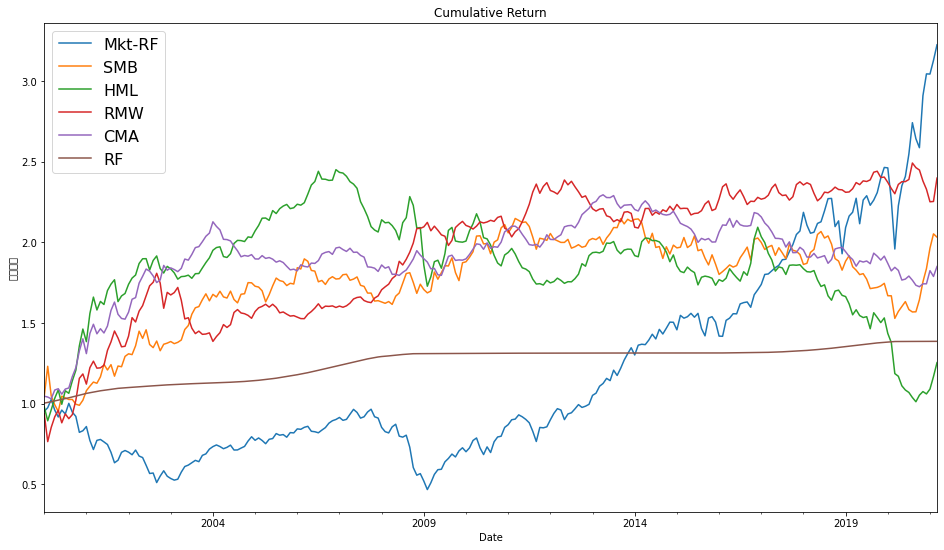

In [ ]:
# 요인별 누적 수익률 그래프를 그려보아요. 

ff5_cumr = (1+ff5/100).cumprod()
ff5_cumr

ff5_cumr.plot(figsize=(16,9)) 
plt.title('Cumulative Return') 
plt.xlabel('Date') 
plt.ylabel('누적수익') 
plt.legend();

In [ ]:
# 주가 수익률 (yahoo finance에서 다운, 5요인과 포트폴리오 (Ken French Lib 에서 다운) 을 머지해주세요

df = pd.merge(ff, s_retm,left_index=True, right_index=True, how='inner')
df

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05,-6.19,0.00,-1.04,2.50,2.41,0.01,-8.3451,-6.0736,-7.1800,-7.9325,-5.0555,-5.9399,-5.3551,-7.7083,-5.7626,-7.1048,-7.0009,-5.9974,-7.9810,-6.2613,-6.6192,-7.0182,-8.8622,-9.1601,-6.3936,-5.4882,-6.3880,-4.8116,-5.2258,-2.4045,-12.8931,1.189776,8.775726,-3.209451,7.497973,-9.148553,-23.709192,2.281330
2012-06,3.89,0.94,0.58,-1.26,0.32,0.00,7.3312,7.1861,6.0284,5.5070,5.4734,6.8845,4.9458,3.6985,3.0553,5.1558,5.1535,3.2289,1.7805,2.8234,4.3243,0.4177,1.5920,3.7232,2.6228,3.2668,2.7675,4.4528,5.5418,5.0600,5.6172,4.051099,1.259443,0.066935,7.004497,8.242885,6.027202,2.935262
2012-07,0.79,-2.69,-0.05,0.93,0.10,0.00,-2.3680,1.2371,-3.2798,-1.6156,-2.2835,-4.2939,-0.5857,-0.8331,-1.1764,-0.3977,-2.3359,-0.3738,-0.1105,0.8498,-4.3878,-2.6646,0.0645,-0.0037,0.1467,-0.9527,1.4724,2.4539,1.4940,1.1006,-1.7322,1.329112,4.723483,8.929896,-11.879240,-13.330341,-34.053312,0.528839
2012-08,2.55,0.44,1.12,-1.42,-0.72,0.01,2.3414,0.5739,4.1571,2.6860,3.3584,1.8868,2.5619,2.8372,3.1239,3.8771,5.0840,3.5554,4.0805,4.2457,3.6275,4.1234,3.7443,2.8341,3.4321,6.4684,2.0908,2.5261,1.4155,0.5413,6.4423,1.993268,9.116565,8.034159,5.096211,5.520919,-16.863668,4.581638
2012-09,2.73,0.65,1.56,-1.32,1.60,0.01,4.6008,5.7413,4.4748,4.6201,4.6308,5.1949,3.6354,3.4008,3.9096,3.6498,2.8311,1.5367,1.6932,2.7831,3.9500,2.1674,1.9670,2.3214,2.6648,3.3454,1.7786,2.4211,3.6288,3.2941,5.4359,2.446543,0.478032,9.772297,4.090225,-8.398846,19.850826,2.216408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,12.47,6.75,2.11,-2.78,1.05,0.01,25.4603,21.6852,19.8299,20.5356,23.9605,21.3881,19.0704,17.9596,19.0574,19.3157,19.8737,16.9854,15.3246,16.6395,21.5046,13.8204,12.8281,15.9609,15.7106,20.4074,10.7257,9.8547,14.4605,16.1654,21.9780,10.338156,9.439307,8.546470,39.815146,3.687717,5.759237,13.265583
2020-12,4.63,4.67,-1.36,-2.15,0.00,0.01,13.1824,7.8131,9.2485,8.4380,7.1857,11.2639,10.0651,8.8478,8.5000,6.9177,12.2766,8.6516,6.9268,9.5035,7.9595,6.8499,5.9012,4.7273,7.8074,5.4380,5.3004,1.8685,3.4180,3.2349,8.0465,3.678657,11.204869,-0.386978,23.374806,10.109103,-1.134308,-4.287070
2021-01,-0.03,6.88,2.85,-3.33,4.68,0.00,16.6884,14.9932,8.1742,7.4137,39.7561,12.1049,5.8029,7.6529,3.7230,8.9171,2.5181,0.9032,2.4192,1.8087,4.3874,-0.2722,0.6493,-0.2155,2.3786,1.6662,-0.9357,-0.5954,-2.0951,0.8452,1.0989,-1.015353,-0.024916,5.099530,13.207939,0.304494,-5.067160,1.574669


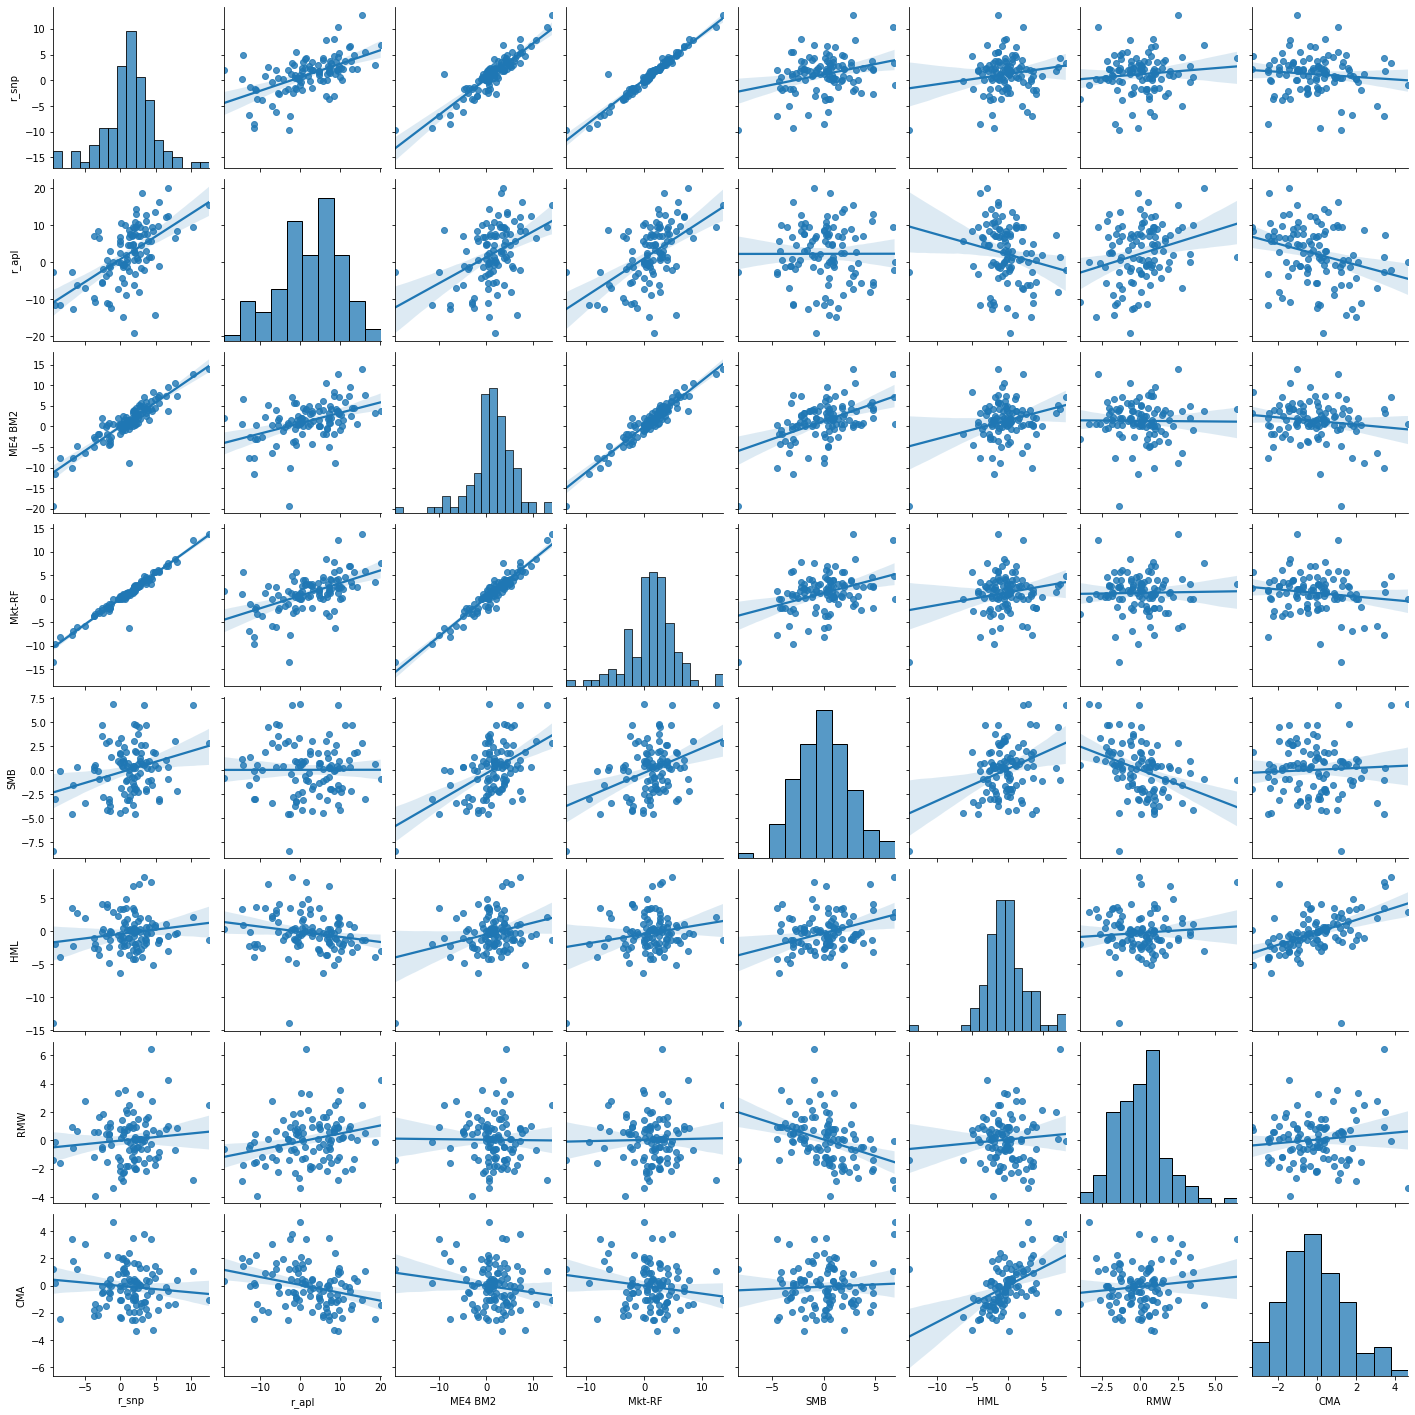

In [ ]:
# Pairplot: scatter matrices

sns.pairplot(data=df, vars=['r_snp','r_apl', 'ME4 BM2', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA'],
                 kind='reg')  

In [ ]:
df.corr()

In [ ]:
# 포트폴리오 수익률에서 무위험 수익률을 빼주어요. 이것은 모형추정의 종속변수를 만드는 과정이랍니다. for회귀분석

df['r_snp_rf'] = df.r_snp - df.RF
df

,Mkt-RF,SMB,HML,RMW,CMA,RF,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,ME3 BM1,ME3 BM2,ME3 BM3,ME3 BM4,ME3 BM5,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,r_snp,r_apl,r_ggl,r_tsl,r_nfx,r_fb,r_fid,r_snp_rf
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05,-6.19,0.00,-1.04,2.50,2.41,0.01,-8.3451,-6.0736,-7.1800,-7.9325,-5.0555,-5.9399,-5.3551,-7.7083,-5.7626,-7.1048,-7.0009,-5.9974,-7.9810,-6.2613,-6.6192,-7.0182,-8.8622,-9.1601,-6.3936,-5.4882,-6.3880,-4.8116,-5.2258,-2.4045,-12.8931,1.189776,8.775726,-3.209451,7.497973,-9.148553,-23.709192,2.281330,1.179776
2012-06,3.89,0.94,0.58,-1.26,0.32,0.00,7.3312,7.1861,6.0284,5.5070,5.4734,6.8845,4.9458,3.6985,3.0553,5.1558,5.1535,3.2289,1.7805,2.8234,4.3243,0.4177,1.5920,3.7232,2.6228,3.2668,2.7675,4.4528,5.5418,5.0600,5.6172,4.051099,1.259443,0.066935,7.004497,8.242885,6.027202,2.935262,4.051099
2012-07,0.79,-2.69,-0.05,0.93,0.10,0.00,-2.3680,1.2371,-3.2798,-1.6156,-2.2835,-4.2939,-0.5857,-0.8331,-1.1764,-0.3977,-2.3359,-0.3738,-0.1105,0.8498,-4.3878,-2.6646,0.0645,-0.0037,0.1467,-0.9527,1.4724,2.4539,1.4940,1.1006,-1.7322,1.329112,4.723483,8.929896,-11.879240,-13.330341,-34.053312,0.528839,1.329112
2012-08,2.55,0.44,1.12,-1.42,-0.72,0.01,2.3414,0.5739,4.1571,2.6860,3.3584,1.8868,2.5619,2.8372,3.1239,3.8771,5.0840,3.5554,4.0805,4.2457,3.6275,4.1234,3.7443,2.8341,3.4321,6.4684,2.0908,2.5261,1.4155,0.5413,6.4423,1.993268,9.116565,8.034159,5.096211,5.520919,-16.863668,4.581638,1.983268
2012-09,2.73,0.65,1.56,-1.32,1.60,0.01,4.6008,5.7413,4.4748,4.6201,4.6308,5.1949,3.6354,3.4008,3.9096,3.6498,2.8311,1.5367,1.6932,2.7831,3.9500,2.1674,1.9670,2.3214,2.6648,3.3454,1.7786,2.4211,3.6288,3.2941,5.4359,2.446543,0.478032,9.772297,4.090225,-8.398846,19.850826,2.216408,2.436543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11,12.47,6.75,2.11,-2.78,1.05,0.01,25.4603,21.6852,19.8299,20.5356,23.9605,21.3881,19.0704,17.9596,19.0574,19.3157,19.8737,16.9854,15.3246,16.6395,21.5046,13.8204,12.8281,15.9609,15.7106,20.4074,10.7257,9.8547,14.4605,16.1654,21.9780,10.338156,9.439307,8.546470,39.815146,3.687717,5.759237,13.265583,10.328156
2020-12,4.63,4.67,-1.36,-2.15,0.00,0.01,13.1824,7.8131,9.2485,8.4380,7.1857,11.2639,10.0651,8.8478,8.5000,6.9177,12.2766,8.6516,6.9268,9.5035,7.9595,6.8499,5.9012,4.7273,7.8074,5.4380,5.3004,1.8685,3.4180,3.2349,8.0465,3.678657,11.204869,-0.386978,23.374806,10.109103,-1.134308,-4.287070,3.668657
2021-01,-0.03,6.88,2.85,-3.33,4.68,0.00,16.6884,14.9932,8.1742,7.4137,39.7561,12.1049,5.8029,7.6529,3.7230,8.9171,2.5181,0.9032,2.4192,1.8087,4.3874,-0.2722,0.6493,-0.2155,2.3786,1.6662,-0.9357,-0.5954,-2.0951,0.8452,1.0989,-1.015353,-0.024916,5.099530,13.207939,0.304494,-5.067160,1.574669,-1.015353


In [ ]:
# 이제 종속변수와 설명변수 행렬을 구성해주어요. 
# 설명변수 행렬은 절편(1로 구성된 column vecctor)을 포함시켜주어요. 
y=df['r_snp_rf']
X=df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
X = sm.add_constant(X)
X

,const,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,,
2012-05,1.0,-6.19,0.00,-1.04,2.50,2.41
2012-06,1.0,3.89,0.94,0.58,-1.26,0.32
2012-07,1.0,0.79,-2.69,-0.05,0.93,0.10
2012-08,1.0,2.55,0.44,1.12,-1.42,-0.72
2012-09,1.0,2.73,0.65,1.56,-1.32,1.60
...,...,...,...,...,...,...
2020-11,1.0,12.47,6.75,2.11,-2.78,1.05
2020-12,1.0,4.63,4.67,-1.36,-2.15,0.00
2021-01,1.0,-0.03,6.88,2.85,-3.33,4.68


In [ ]:
# 이제 선형회귀식을 추정해보아요. 

olsreg = sm.OLS(y, X)
result =olsreg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               r_snp_rf   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     522.3
Date:                Tue, 04 May 2021   Prob (F-statistic):           1.81e-70
Time:                        15:33:09   Log-Likelihood:                -113.91
No. Observations:                 107   AIC:                             239.8
Df Residuals:                     101   BIC:                             255.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0097      0.074     -0.131      0.896      -0.157       0.137
Mkt-RF         0.9166      0.020     46.043      0.000       0.877       0.956
SMB           -0.0697      0.034     -2.063      0.042      -0.137      -0.003
HML           -0.0656      0.031     -2.135      0.035      -0.127      -0.005
RMW            0.1419      0.048      2.948      0.004       0.046       0.237
CMA            0.1504      0.054      2.800      0.006       0.044       0.257
==============================================================================
Omnibus:                      170.194   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11781.149
Skew:                           5.981   Prob(JB):                         0.00
Kurtosis:                      52.994   Cond. No.                         4.80
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CAPM, FF Three-Factor, FF Five-Factor Model을 동시에 추정해서 출력을 비교하고자 다음 함수를 정의합니다. 

In [ ]:
def FFReg(df_stk):
    import pandas_datareader.data as web  # 필요한 lib들을 불러보아요 
    import statsmodels.formula.api as sm # 모형 추정
    from statsmodels.iolib.summary2 import summary_col # 추정결과 출력 

    # Reading in factor data
    df_factors = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench')[0] # fama-french 5요인을 다운 받아요 
    df_factors.rename(columns={'Mkt-RF': 'MKT'}, inplace=True) # 시장요인 변수명을 변경해주어요. 
    df_factors['MKT'] = df_factors['MKT']
    df_factors['SMB'] = df_factors['SMB'] 
    df_factors['HML'] = df_factors['HML'] 
    df_factors['RMW'] = df_factors['RMW'] 
    df_factors['CMA'] = df_factors['CMA'] 
    
    # 요인 데이터와 수익률 데이터 머지하면서 표본 기간이 일치하게 되요. 
    df_stock_factor = pd.merge(df_stk,df_factors,left_index=True,right_index=True) # 대상 자산 수익률과  요인 자료를 머지 (monthly data, %)
    df_stock_factor['XRet'] = df_stock_factor['Returns'] - df_stock_factor['RF'] # 초과수익률

    # 회귀분석 모형: CAPM, FF3, and FF5 
    CAPM = sm.ols(formula = 'XRet ~ MKT', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF3 = sm.ols( formula = 'XRet ~ MKT + SMB + HML', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})
    FF5 = sm.ols( formula = 'XRet ~ MKT + SMB + HML + RMW + CMA', data=df_stock_factor).fit(cov_type='HAC',cov_kwds={'maxlags':1})

    CAPMtstat = CAPM.tvalues
    FF3tstat = FF3.tvalues
    FF5tstat = FF5.tvalues

    CAPMcoeff = CAPM.params
    FF3coeff = FF3.params
    FF5coeff = FF5.params

    # 추정치와  t-값을 가지고 DataFrame을 만듬 
    results_df = pd.DataFrame({'CAPMcoeff':CAPMcoeff,'CAPMtstat':CAPMtstat,
                               'FF3coeff':FF3coeff, 'FF3tstat':FF3tstat,
                               'FF5coeff':FF5coeff, 'FF5tstat':FF5tstat},
    index = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])


    dfoutput = summary_col([CAPM,FF3, FF5],stars=True,float_format='%0.3f',
                  model_names=['CAPM','FF3','FF5'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'Adjusted R^2':lambda x: "{:.3f}".format(x.rsquared_adj)}, 
                             regressor_order = ['Intercept', 'MKT', 'SMB', 'HML', 'RMW', 'CMA'])

    print(dfoutput)
    
    return results_df

In [ ]:
df['Returns'] = df.r_snp  
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    -0.095   -0.137**  -0.135** 
             (0.086)  (0.054)   (0.054)  
MKT          0.899*** 0.938***  0.942*** 
             (0.026)  (0.015)   (0.015)  
SMB                   -0.115*** -0.106***
                      (0.015)   (0.015)  
HML                   -0.024    -0.045   
                      (0.028)   (0.036)  
RMW                             0.036    
                                (0.031)  
CMA                             0.073    
                                (0.059)  
N            59       59        59       
Adjusted R^2 0.984    0.991     0.992    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,-0.095439,-1.104950,-0.136878,-2.532455,-0.135368,-2.517983
MKT,0.898750,34.670665,0.937975,64.078956,0.941584,60.925501
SMB,NaN,NaN,-0.114806,-7.719322,-0.106453,-6.986767
HML,NaN,NaN,-0.024097,-0.865880,-0.044758,-1.226398
RMW,NaN,NaN,NaN,NaN,0.036271,1.173342
CMA,NaN,NaN,NaN,NaN,0.073351,1.238878


In [ ]:
df['Returns'] = df.r_apl 
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    1.512*   0.760     0.892    
             (0.841)  (0.779)   (0.755)  
MKT          1.070*** 1.347***  1.193*** 
             (0.180)  (0.189)   (0.215)  
SMB                   -0.436    -0.157   
                      (0.306)   (0.363)  
HML                   -0.747*** -0.761***
                      (0.244)   (0.259)  
RMW                             0.931    
                                (0.636)  
CMA                             -0.241   
                                (0.562)  
N            59       59        59       
Adjusted R^2 0.323    0.451     0.456    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,1.512340,1.797304,0.759773,0.974718,0.892091,1.181934
MKT,1.070492,5.930710,1.346537,7.120892,1.193257,5.538868
SMB,NaN,NaN,-0.435753,-1.423692,-0.156687,-0.431597
HML,NaN,NaN,-0.747270,-3.066471,-0.761464,-2.939214
RMW,NaN,NaN,NaN,NaN,0.931174,1.464843
CMA,NaN,NaN,NaN,NaN,-0.240946,-0.429029


In [ ]:
df['Returns'] = df.r_apl 
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    1.512*   0.760     0.892    
             (0.841)  (0.779)   (0.755)  
MKT          1.070*** 1.347***  1.193*** 
             (0.180)  (0.189)   (0.215)  
SMB                   -0.436    -0.157   
                      (0.306)   (0.363)  
HML                   -0.747*** -0.761***
                      (0.244)   (0.259)  
RMW                             0.931    
                                (0.636)  
CMA                             -0.241   
                                (0.562)  
N            59       59        59       
Adjusted R^2 0.323    0.451     0.456    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,1.512340,1.797304,0.759773,0.974718,0.892091,1.181934
MKT,1.070492,5.930710,1.346537,7.120892,1.193257,5.538868
SMB,NaN,NaN,-0.435753,-1.423692,-0.156687,-0.431597
HML,NaN,NaN,-0.747270,-3.066471,-0.761464,-2.939214
RMW,NaN,NaN,NaN,NaN,0.931174,1.464843
CMA,NaN,NaN,NaN,NaN,-0.240946,-0.429029


In [ ]:
df['Returns'] = df.r_tsl
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM     FF3      FF5   
---------------------------------------
Intercept    3.700*   2.859    2.822   
             (2.177)  (2.198)  (2.089) 
MKT          1.626*** 1.950*** 2.155***
             (0.543)  (0.602)  (0.541) 
SMB                   -0.545   -0.468  
                      (0.896)  (0.814) 
HML                   -0.824   -1.437**
                      (0.680)  (0.632) 
RMW                            0.508   
                               (1.818) 
CMA                            2.357*  
                               (1.242) 
N            59       59       59      
Adjusted R^2 0.174    0.193    0.209   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,3.700149,1.699509,2.858959,1.300494,2.821617,1.350835
MKT,1.626407,2.993840,1.950203,3.241001,2.154643,3.979917
SMB,NaN,NaN,-0.544690,-0.607734,-0.467993,-0.575207
HML,NaN,NaN,-0.824451,-1.211688,-1.436996,-2.275127
RMW,NaN,NaN,NaN,NaN,0.508499,0.279690
CMA,NaN,NaN,NaN,NaN,2.356955,1.898437


In [ ]:
df['Returns'] = df['SMALL LoBM']
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM      FF3       FF5   
-----------------------------------------
Intercept    0.410    0.165     0.067    
             (0.648)  (0.397)   (0.361)  
MKT          1.425*** 1.020***  1.126*** 
             (0.145)  (0.112)   (0.101)  
SMB                   1.728***  1.514*** 
                      (0.165)   (0.161)  
HML                   -0.595*** -0.555***
                      (0.096)   (0.118)  
RMW                             -0.726***
                                (0.268)  
CMA                             0.070    
                                (0.209)  
N            59       59        59       
Adjusted R^2 0.625    0.887     0.897    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,0.409996,0.632806,0.164819,0.415545,0.066864,0.184969
MKT,1.424840,9.848139,1.020067,9.084441,1.125934,11.139856
SMB,NaN,NaN,1.727976,10.462379,1.514047,9.376072
HML,NaN,NaN,-0.594533,-6.221027,-0.554928,-4.698704
RMW,NaN,NaN,NaN,NaN,-0.725750,-2.704616
CMA,NaN,NaN,NaN,NaN,0.070347,0.337365


In [ ]:
df['Returns'] = df['BIG HiBM']
df_1 =df[['Returns']]
FFReg(df_1)


               CAPM     FF3       FF5   
----------------------------------------
Intercept    -0.551   0.274    0.214    
             (0.533)  (0.243)  (0.194)  
MKT          1.442*** 1.236*** 1.258*** 
             (0.122)  (0.063)  (0.064)  
SMB                   0.115    -0.057   
                      (0.106)  (0.086)  
HML                   0.887*** 1.074*** 
                      (0.085)  (0.089)  
RMW                            -0.646***
                               (0.151)  
CMA                            -0.560***
                               (0.151)  
N            59       59       59       
Adjusted R^2 0.761    0.935    0.957    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


,CAPMcoeff,CAPMtstat,FF3coeff,FF3tstat,FF5coeff,FF5tstat
Intercept,-0.551145,-1.034656,0.273671,1.124155,0.213904,1.100330
MKT,1.442218,11.794412,1.235623,19.632526,1.257729,19.631240
SMB,NaN,NaN,0.114903,1.079967,-0.056602,-0.660824
HML,NaN,NaN,0.887104,10.419563,1.073793,12.120071
RMW,NaN,NaN,NaN,NaN,-0.646125,-4.267861
CMA,NaN,NaN,NaN,NaN,-0.560450,-3.723675
